# Employee Data for Salary hike for calculation

In [1]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt

In [2]:
emp_data= pd.read_csv('emp_data.csv')

<IPython.core.display.Javascript object>

In [3]:
emp_data

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [4]:
emp_data.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


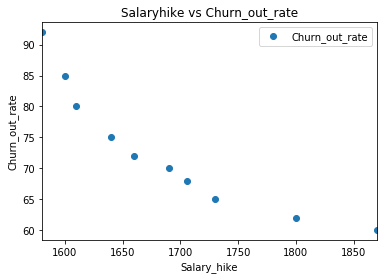

In [5]:
emp_data.plot(x='Salary_hike', y='Churn_out_rate', style='o') 
plt.title('Salaryhike vs Churn_out_rate')  
plt.xlabel('Salary_hike') 
plt.ylabel('Churn_out_rate')
plt.show()

In [6]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(emp_data['Salary_hike'], emp_data['Churn_out_rate'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(emp_data['Salary_hike'], emp_data['Churn_out_rate'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.912
Spearmans correlation: -1.000


<IPython.core.display.Javascript object>

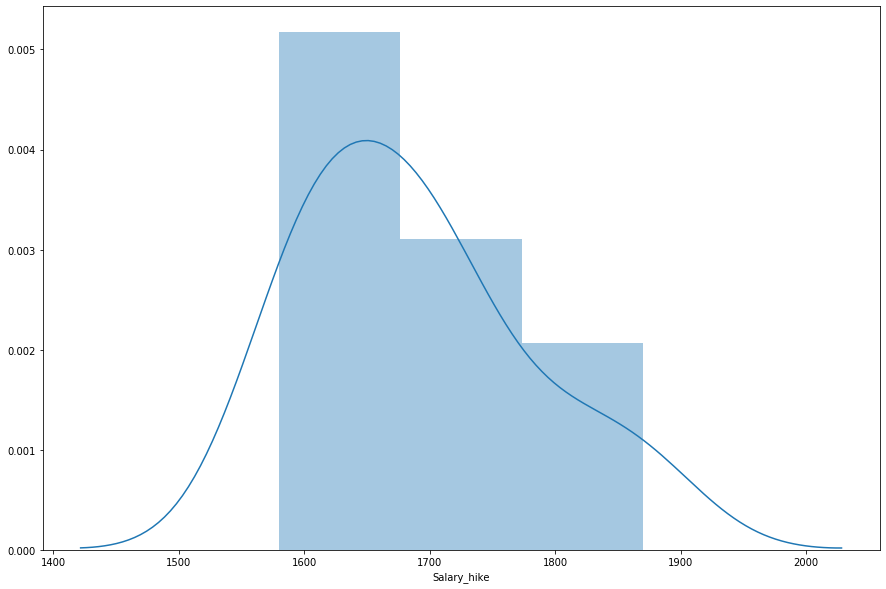

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(emp_data['Salary_hike'])
plt.show()            

<IPython.core.display.Javascript object>

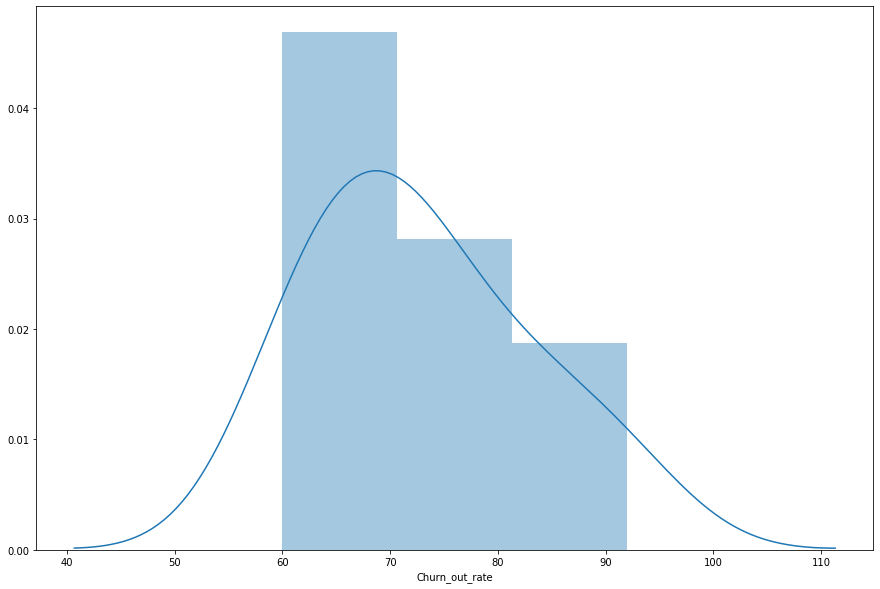

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(emp_data['Churn_out_rate'])
plt.show()

In [9]:
import logging as log
# Input dataset
X = emp_data['Salary_hike'].values.reshape(-1,1)
print(X)
# Output or Predicted Value of data
y = emp_data['Churn_out_rate'].values.reshape(-1,1)
#print(log(y))


[[1580]
 [1600]
 [1610]
 [1640]
 [1660]
 [1690]
 [1706]
 [1730]
 [1800]
 [1870]]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [12]:
predict_reg = LinearRegression()

# Simple model without using any transformation

In [13]:
# Train the Model using linear Regression
predict_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [237.33269953]
Coefficient value of Model is  [[-0.09763174]]


In [15]:
y_pred = predict_reg.predict(X_test)

In [16]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

<IPython.core.display.Javascript object>

,Actual,Predict
0,62,61.595574
1,85,81.121921


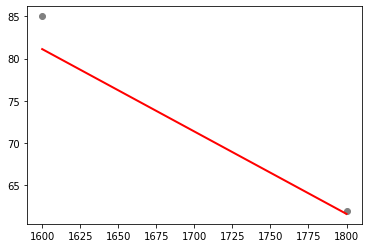

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.141252242842981
Mean Squared Error: 7.601526993161889
Root Mean Squared Error: 2.7570866858265246
R^2 Score :           0.9425215350233506


#  Quadratic Transformation

In [19]:
emp_data['Square_S_hike'] = emp_data.apply(lambda row: row.Salary_hike**2, axis =1 )

In [21]:
X = emp_data.iloc[:,emp_data.columns != 'Churn_out_rate']
Y = emp_data.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)
print(Y_test)


8    62
1    85
Name: Churn_out_rate, dtype: int64


In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)



 Intercept value of Model is  1664.7928920894628


<IPython.core.display.Javascript object>

               Coefficient
Salary_hike      -1.755588
Square_S_hike     0.000480


In [24]:
y_pred_q_q = model.predict(X_test)

In [25]:
df_34 = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_34.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
8,62,59.977079
1,85,84.685698


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 1.168611984009999
Mean Squared Error: 2.0954986994034486
Root Mean Squared Error: 1.4475837452125002
R^2 Score :           0.9841550192861743


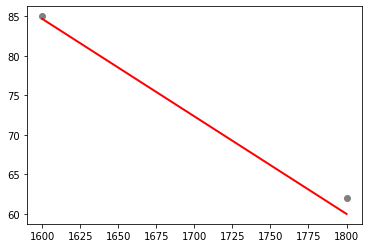

In [27]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='gray')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

#  Cubic  Transformation

In [28]:
emp_data['Cube_S_hike'] = emp_data.apply(lambda row: row.Salary_hike**3, axis =1 )
emp_data

,Salary_hike,Churn_out_rate,Square_S_hike,Cube_S_hike
0,1580,92,2496400,3944312000
1,1600,85,2560000,4096000000
2,1610,80,2592100,4173281000
3,1640,75,2689600,4410944000
4,1660,72,2755600,4574296000
5,1690,70,2856100,4826809000
6,1706,68,2910436,4965203816
7,1730,65,2992900,5177717000
8,1800,62,3240000,5832000000
9,1870,60,3496900,6539203000


In [29]:
X = emp_data.iloc[:,emp_data.columns != 'Churn_out_rate']
Y = emp_data.iloc[:,1]
X_train, X_test_1, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)
print(Y_test)


8    62
1    85
Name: Churn_out_rate, dtype: int64


In [30]:
cube_model = LinearRegression()
cube_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(" Intercept value of Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


 Intercept value of Model is  17926.902756339736


<IPython.core.display.Javascript object>

               Coefficient
Salary_hike     -30.243875
Square_S_hike     0.017082
Cube_S_hike      -0.000003


In [32]:
y_pred_cube = cube_model.predict(X_test_1)

In [33]:
df_33 = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_cube})
df_33.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
8,62,64.595056
1,85,84.498453


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_cube))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_cube) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_cube))

Mean Absolute Error: 1.548301580698535
Mean Squared Error: 3.4929330716835127
Root Mean Squared Error: 1.8689390229976774
R^2 Score :           0.97358840777555


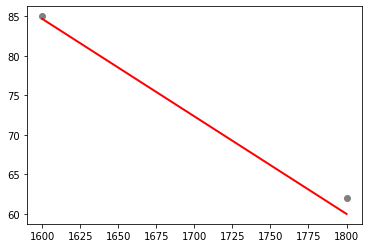

In [35]:
x_t_c =np.array(X_test_1)
plt.scatter(x_t_c[:,0], Y_test,  color='gray')
plt.plot(x_t_c[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

# Logrithm Transformation
y= a+ b* log(x)

In [36]:
log_model= emp_data
log_model= log_model.drop(['Square_S_hike','Cube_S_hike'], axis=1)

In [37]:
log_model['log_hike']=np.log( log_model['Salary_hike'])

In [38]:
log_model= log_model.drop(['Salary_hike'], axis=1)

In [39]:
log_model

,Churn_out_rate,log_hike
0,92,7.365180
1,85,7.377759
2,80,7.383989
3,75,7.402452
4,72,7.414573
5,70,7.432484
6,68,7.441907
7,65,7.455877
8,62,7.495542
9,60,7.533694


In [40]:
X_log = log_model['log_hike'].values.reshape(-1,1)
print(X_log)
# Output or Predicted Value of data
y_log = log_model['Churn_out_rate'].values.reshape(-1,1)
#print(log(y))

X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

[[7.36518013]
 [7.37775891]
 [7.38398946]
 [7.40245152]
 [7.41457288]
 [7.43248381]
 [7.44190673]
 [7.45587669]
 [7.49554194]
 [7.53369371]]


In [41]:
y_pred_log= LinearRegression()

In [42]:
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [1339.3155981]
Co-efficient Value of Log Model is :  [[-170.49467225]]


In [44]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[61.36563104],
       [81.4470111 ]])

In [45]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

<IPython.core.display.Javascript object>

,Actual,Predict
0,62,61.365631
1,85,81.447011


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 2.09367893287083
Mean Squared Error: 6.513077061244732
Root Mean Squared Error: 2.552073090889979
R^2 Score :           0.9507517802552383


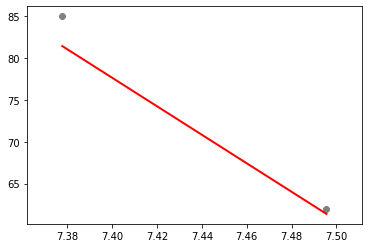

In [47]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

#  Exponential Transformation

*** logY$_i$=α+βX$_i$+ε***

In [48]:
X_exp = log_model['log_hike'].values.reshape(-1,1)

# Output or Predicted Value of data
y_exp = np.log(log_model['Churn_out_rate'].values.reshape(-1,1))
print(y_exp)


[[4.52178858]
 [4.44265126]
 [4.38202663]
 [4.31748811]
 [4.27666612]
 [4.24849524]
 [4.21950771]
 [4.17438727]
 [4.12713439]
 [4.09434456]]


In [49]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state= 42)

In [50]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [21.65242635]
 Exponent model Coefficient value is  [[-2.33862265]]


In [52]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[4.12318216],
       [4.39863224]])

In [53]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

<IPython.core.display.Javascript object>

,Actual,Predict
0,4.127134,4.123182
1,4.442651,4.398632


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.02398562088178524
Mean Squared Error: 0.0009766470474319412
Root Mean Squared Error: 0.03125135272963302
R^2 Score :           0.9607578802385595


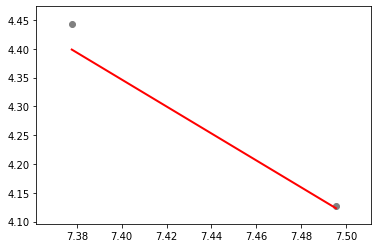

In [55]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

# Conclusion 

WE have found that while transform the model, got various values for MAE, RMSE, MSE  and R$^2$ Values.
Summery of the following Models
- Simple linear Regression Model 
        Mean Absolute Error: 2.141252242842981
        Mean Squared Error: 7.601526993161889
        Root Mean Squared Error: 2.7570866858265246
        ***R$^2$ Score :           0.9425215350233506***

- Logrithm Transformation Model
        Mean Absolute Error: 2.09367893287083
        Mean Squared Error: 6.513077061244732
        Root Mean Squared Error: 2.552073090889979
        R$^2$ Score :           0.9507517802552383

- Exponential Transformation Model
        Mean Absolute Error: 0.02398562088178524
        Mean Squared Error: 0.0009766470474319412
        Root Mean Squared Error: 0.03125135272963302
        R^2 Score :           0.9607578802385595

- Quadratic Transformation Model
        Mean Absolute Error: 1.168611984009999
        Mean Squared Error: 2.0954986994034486
        Root Mean Squared Error: 1.4475837452125002
        R^2 Score :           0.9841550192861743

- Cubic Transformation Model
        Mean Absolute Error: 1.548301580698535
        Mean Squared Error: 3.4929330716835127
        Root Mean Squared Error: 1.8689390229976774
        R^2 Score :           0.97358840777555